# Was Montana Meth Prevention Project Effective?
Your task is to determine if Montana Meth Prevention Project (MMP) was effective in decreasing the  
methamphetamine use among Montana teens.   
  
**Background and Data**  
2005-2007 Montana conducted an agressive ad campaign to decrease the meth abuse by the youth.  
Your task is to analyze the efficacy of the campaign using Youth Risk Behavior Surve (YRBS) data.  
The example code below does before-after estimator, you will implement cross-sectional estimator and  
differences-in-differences (DiD) estimator. The sample, necessary for this lab, is on canvas. The full data  
and documentation can be obtained from https://www.cdc.gov/healthyyouth/data/yrbs/data.htm.  
The variables in the sample are:  
**year** survey year (2003-2009)  
**age** age, 14-17 years  
**sex** M,F  
**meth** 1 = has used methamphetamines in life  
**tv** 1 = watches more than 1hr TV on average schoolday (a large number of the project ads were displayed  
on TV).  
**state** MT = Montana, XX = national sample  
# Example: before-after estimator
Load the data and do some exploration.

In [76]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf

In [77]:
yrbs = pd.read_csv("yrbs.tsv.bz2", sep='\t')
yrbs.shape

(58077, 6)

In [78]:
yrbs

,year,age,sex,meth,tv,state
0,2003,13,M,0,1,XX
1,2003,13,M,1,1,XX
2,2003,13,M,1,1,XX
3,2003,13,M,0,1,XX
4,2003,13,M,0,0,XX
...,...,...,...,...,...,...
58072,2009,17,F,0,0,MT
58073,2009,17,F,0,0,MT
58074,2009,17,F,0,0,MT
58075,2009,17,F,0,0,MT


In [79]:
yrbs.columns

Index(['year', 'age', 'sex', 'meth', 'tv', 'state'], dtype='object')

In [80]:
yrbs.describe()

,year,age,meth,tv
count,58077.000000,58077.000000,58077.000000,58077.000000
mean,2006.037416,15.796047,0.051105,0.603148
std,2.247649,0.999958,0.220213,0.489249
min,2003.000000,13.000000,0.000000,0.000000
25%,2005.000000,15.000000,0.000000,0.000000
50%,2007.000000,16.000000,0.000000,1.000000
75%,2009.000000,17.000000,0.000000,1.000000
max,2009.000000,17.000000,1.000000,1.000000


So we have 58077 cases in the data, seems like no missings.  
Next, lets do some graphical exploration. Plot the mean value of meth use for each year, separately for Montana and national sample.

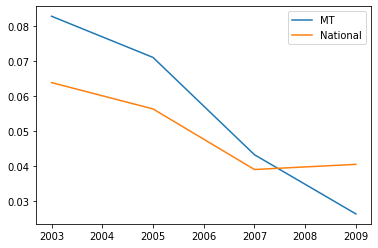

In [81]:
yearly = yrbs.groupby(['year', 'state'], as_index=False).meth.mean() #groupby 不要另外分列的方法
plt.plot(yearly[yearly.state == 'MT'].year, yearly[yearly.state == 'MT'].meth,label='MT')
plt.plot(yearly[yearly.state == 'XX'].year, yearly[yearly.state == 'XX'].meth,label='National')
plt.legend()#图例
plt.show()

Now it's time to do before-after estimator. First we comput an additional variable: before denoting the time period before the campaign (i.e. years 2003, 2005) contrary to after the campaign (2007, 2009).

In [82]:
yrbs['before'] = yrbs.year < 2006
yrbs.before.describe()

count     58077
unique        2
top       False
freq      29728
Name: before, dtype: object

We see 58077 valids cases, i.e no missings here.  
Now let's compare the meth usage before and after the campaign. We start with a simple table:

In [83]:
yrbs[yrbs.state == 'MT'].groupby('before').meth.mean()

before
False    0.038115
True     0.076734
Name: meth, dtype: float64

Note that we have to select just Montana as the rest of the sample was not affected by the campaign.  
The table suggests that the amphetamine use had decreased substantially, approximately 3.6 pct points,over the time period we observe in the data. This corresponds pretty well to the graphical exploration(blue line).  
Next, we do this as a simple regression with no additional controls:

In [84]:
m = smf.ols(formula = 'meth ~ before', data=yrbs[yrbs.state == 'MT'])
r = m.fit()
r.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   meth   R-squared:                       0.007
Model:                            OLS   Adj. R-squared:                  0.007
Method:                 Least Squares   F-statistic:                     67.66
Date:                Mon, 27 Jan 2020   Prob (F-statistic):           2.19e-16
Time:                        19:24:48   Log-Likelihood:                 417.76
No. Observations:                9754   AIC:                            -831.5
Df Residuals:                    9752   BIC:                            -817.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          0.0381      0.003     11.484      0.000       0.032       0.045
before[T.True]     0.0386      0.005      8.225      0.000       0.029       0.048
==============================================================================
Omnibus:                     7326.455   Durbin-Watson:                   1.957
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            84570.020
Skew:                           3.765   Prob(JB):                         0.00
Kurtosis:                      15.304   Cond. No.                         2.62
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The table revels before being 0.0386, i.e. the amphetamine use was 3.86 pct points higher in Montana before the campaign.  
And finally we add all the relevant controls:

In [85]:
m = smf.ols(formula = 'meth ~ before + age + sex + tv', data=yrbs[yrbs.state == 'MT'])
r = m.fit()
r.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   meth   R-squared:                       0.009
Model:                            OLS   Adj. R-squared:                  0.009
Method:                 Least Squares   F-statistic:                     23.20
Date:                Mon, 27 Jan 2020   Prob (F-statistic):           4.11e-19
Time:                        19:24:48   Log-Likelihood:                 430.25
No. Observations:                9754   AIC:                            -850.5
Df Residuals:                    9749   BIC:                            -814.6
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         -0.1476      0.038     -3.911      0.000      -0.222      -0.074
before[T.True]     0.0386      0.005      8.221      0.000       0.029       0.048
sex[T.M]          -0.0031      0.005     -0.653      0.514      -0.012       0.006
age                0.0118      0.002      4.953      0.000       0.007       0.016
tv                 0.0035      0.005      0.739      0.460      -0.006       0.013
==============================================================================
Omnibus:                     7302.251   Durbin-Watson:                   1.963
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            83719.425
Skew:                           3.750   Prob(JB):                         0.00
Kurtosis:                      15.237   Cond. No.                         255.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The other controls do not seem to affect the before variable, apparently the usage change patterns were not closely related to any of these controls.

# Your Tasks
## Cross-Sectional Estimator
Compare the meth use (mean value) in Montana and nationally after the project. In each case interpret  
the results.  
* Do it as a simple table  
* Do it using regression without any other controls  
* Run a regression with full controls.  

In [86]:
yrbs

,year,age,sex,meth,tv,state,before
0,2003,13,M,0,1,XX,True
1,2003,13,M,1,1,XX,True
2,2003,13,M,1,1,XX,True
3,2003,13,M,0,1,XX,True
4,2003,13,M,0,0,XX,True
...,...,...,...,...,...,...,...
58072,2009,17,F,0,0,MT,False
58073,2009,17,F,0,0,MT,False
58074,2009,17,F,0,0,MT,False
58075,2009,17,F,0,0,MT,False


In [87]:
yrbs['after'] = yrbs.year >= 2006
yrbs[yrbs.after == True].groupby('state').meth.mean()

state
MT    0.038115
XX    0.039923
Name: meth, dtype: float64

After the compaign, the meth use (mean value) in Montana is approximiately 0.0018 lower than nationally.

* Do it using regression without any other controls  

In [88]:
m_after = smf.ols(formula = 'meth ~ state', data=yrbs[yrbs.after==True])
r_after = m_after.fit()
r_after.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   meth   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.3503
Date:                Mon, 27 Jan 2020   Prob (F-statistic):              0.554
Time:                        19:24:49   Log-Likelihood:                 6404.0
No. Observations:               29728   AIC:                        -1.280e+04
Df Residuals:                   29726   BIC:                        -1.279e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       0.0381      0.003     13.648      0.000       0.033       0.044
state[T.XX]     0.0018      0.003      0.592      0.554      -0.004       0.008
==============================================================================
Omnibus:                    27196.729   Durbin-Watson:                   1.976
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           619647.247
Skew:                           4.720   Prob(JB):                         0.00
Kurtosis:                      23.277   Cond. No.                         4.75
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The table revels after being 0.0018, i.e. the amphetamine use was 0.18% points lower in Montana after the campaign.

* Run a regression with full controls.

In [89]:
m_after_full = smf.ols(formula = 'meth ~ state + age + sex + tv', data=yrbs[yrbs.after==True])
r_after_full = m_after_full.fit()
r_after_full.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   meth   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     11.60
Date:                Mon, 27 Jan 2020   Prob (F-statistic):           2.07e-09
Time:                        19:24:49   Log-Likelihood:                 6427.0
No. Observations:               29728   AIC:                        -1.284e+04
Df Residuals:                   29723   BIC:                        -1.280e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      -0.0649      0.018     -3.615      0.000      -0.100      -0.030
state[T.XX]     0.0015      0.003      0.494      0.621      -0.005       0.008
sex[T.M]        0.0081      0.002      3.563      0.000       0.004       0.013
age             0.0064      0.001      5.648      0.000       0.004       0.009
tv             -0.0016      0.002     -0.683      0.494      -0.006       0.003
==============================================================================
Omnibus:                    27150.346   Durbin-Watson:                   1.980
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           615983.002
Skew:                           4.709   Prob(JB):                         0.00
Kurtosis:                      23.214   Cond. No.                         253.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The other controls seem to slightly affect the state variable. 
According to the p-values, only the two variables - sex and age - are statistically significant. Holding other variables constant, the possibility of a male to use meth is 0.81% higher than a female. Also, holding other variables constant, every additional age of a person has an estimated chance of 0.64% to take meth use. 

## Differences-in-Differences Estimator
Compare the differences in trends in meth use in Montana and nationally between pre-project and post-
project years. In each case interpret the results.
* Do it as a simple table: report average use before and after the campaign in both Montana and nationally. Compute the effect by calculating the trend difference.
* Do it using regression without any other controls
* Run a regression with full controls.
* Finally, think about all these 3 estimators. Which of these would you consider more reliable than
others? Why?

In [90]:
yrbs.groupby(['state','after']).meth.mean()

state  after
MT     False    0.076734
       True     0.038115
XX     False    0.060319
       True     0.039923
Name: meth, dtype: float64

While pre-project, meth use in MT is approximately 0.016 higher than nationally. After the event, meth use decreases a lot nation-wide. Meth use in MT was even 0.0018 lower than nationally. 

In [91]:
m=smf.ols(formula='meth~after*state',data=yrbs)
r=m.fit()
r.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   meth   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     62.92
Date:                Mon, 27 Jan 2020   Prob (F-statistic):           1.31e-40
Time:                        19:24:50   Log-Likelihood:                 5566.9
No. Observations:               58077   AIC:                        -1.113e+04
Df Residuals:                   58073   BIC:                        -1.109e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept                     0.0767      0.003     24.366      0.000       0.071       0.083
after[T.True]                -0.0386      0.004     -8.674      0.000      -0.047      -0.030
state[T.XX]                  -0.0164      0.003     -4.743      0.000      -0.023      -0.010
after[T.True]:state[T.XX]     0.0182      0.005      3.733      0.000       0.009       0.028
==============================================================================
Omnibus:                    46583.747   Durbin-Watson:                   1.971
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           670089.493
Skew:                           4.057   Prob(JB):                         0.00
Kurtosis:                      17.528   Cond. No.                         12.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

By observing the p-values, the after*state intercetion is sign. Holding other variables the same, the possibility of meth use in MT decrease by 0.0182 after the campaign.

In [92]:
m = smf.ols(formula ='meth ~ after*state + age + sex + tv', data=yrbs)
r = m.fit()
r.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   meth   R-squared:                       0.005
Model:                            OLS   Adj. R-squared:                  0.004
Method:                 Least Squares   F-statistic:                     44.37
Date:                Mon, 27 Jan 2020   Prob (F-statistic):           1.87e-54
Time:                        19:24:50   Log-Likelihood:                 5605.5
No. Observations:               58077   AIC:                        -1.120e+04
Df Residuals:                   58070   BIC:                        -1.113e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept                    -0.0338      0.015     -2.289      0.022      -0.063      -0.005
after[T.True]                -0.0389      0.004     -8.740      0.000      -0.048      -0.030
state[T.XX]                  -0.0167      0.003     -4.800      0.000      -0.023      -0.010
sex[T.M]                      0.0064      0.002      3.486      0.000       0.003       0.010
after[T.True]:state[T.XX]     0.0185      0.005      3.785      0.000       0.009       0.028
age                           0.0070      0.001      7.630      0.000       0.005       0.009
tv                           -0.0041      0.002     -2.154      0.031      -0.008      -0.000
==============================================================================
Omnibus:                    46508.899   Durbin-Watson:                   1.973
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           666670.662
Skew:                           4.049   Prob(JB):                         0.00
Kurtosis:                      17.489   Cond. No.                         259.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The other controls seem to only slightly affect the after*state variable, apparently the usage change patterns were not very closely related to any of these controls.